# Data Science Xtern Work Sample Assessment Class of 2022

**Description of task**:

In order to make the Xtern program the best summer internship program for the participants, the data science team is focusing its efforts on picking out the most convenient coworking space from a list of 5 potential places and providing a sample 10-week activities plan. A sample 10-week activities plan includes a weekly group dinner at different restaurants around Indianapolis, a biweekly sport, music, gaming, and art event, one big conference or Ted Talk event. 

**Task**: 

Please look over the data.xlsx for Xtern housing location and 5 coworking spaces location. Utilize the open-source map API such as Google Map API, OpenStreetMap, AWS Map API to collect useful data around restaurants and event venue location. Use Google to find all the wonderful events that are happening in the Indianapolis area (Hint: EventBrite API). As an important member of the team, you get to come up with your own analysis and explain it! So try your best to dig out any useful information out of this data set. The sky's the limit! 🤓

## Installing the neccessary packages

In [1]:
pip install --upgrade ipython jupyter

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U googlemaps

Note: you may need to restart the kernel to use updated packages.


In [3]:
import googlemaps
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [4]:
gmaps = googlemaps.Client(key='Hidden Key on GitHub')

## Reading in the Data

In [5]:
df = pd.read_csv("Data.csv")

In [6]:
df

,Name,Address,Type
0,IUPUI,"415 Porto Alegre St, Indianapolis, IN 46202",Housing
1,The Speak Easy,"5255 Winthrop Ave #110, Indianapolis, IN 46220",Coworking
2,zWORKS,"85 E Cedar St #1502, Zionsville, IN 46077",Coworking
3,Launch Fishers,"12175 Visionary Way, Fishers, IN 46038",Coworking
4,Industrious Mass Ave,"350 Massachusetts Ave Suite 300, Indianapolis,...",Coworking
...,...,...,...
994,NaN,NaN,NaN
995,NaN,NaN,NaN
996,NaN,NaN,NaN
997,NaN,NaN,NaN


In [7]:
df = df.dropna()
# Removing the NaN values

In [8]:
df

,Name,Address,Type
0,IUPUI,"415 Porto Alegre St, Indianapolis, IN 46202",Housing
1,The Speak Easy,"5255 Winthrop Ave #110, Indianapolis, IN 46220",Coworking
2,zWORKS,"85 E Cedar St #1502, Zionsville, IN 46077",Coworking
3,Launch Fishers,"12175 Visionary Way, Fishers, IN 46038",Coworking
4,Industrious Mass Ave,"350 Massachusetts Ave Suite 300, Indianapolis,...",Coworking
5,Launch Indy,"525 S Meridian St, Indianapolis, IN 46225",Coworking


## Interpreting the Data

In [9]:
# Creating a dictionary with the name as a key with the address as a value
address_dict = {}
for i in range(6):
    address_dict[df.Name[i]] = df.Address[i]
address_dict

{'IUPUI': '415 Porto Alegre St, Indianapolis, IN 46202',
 'The Speak Easy': '5255 Winthrop Ave #110, Indianapolis, IN 46220',
 'zWORKS': '85 E Cedar St #1502, Zionsville, IN 46077',
 'Launch Fishers': '12175 Visionary Way, Fishers, IN 46038',
 'Industrious Mass Ave': '350 Massachusetts Ave Suite 300, Indianapolis, IN 46204',
 'Launch Indy': '525 S Meridian St, Indianapolis, IN 46225'}

In [10]:
# Getting the x and y coordinates for the housing and each co-working space
coordinate_dict = {}
work = {}
count = 0
for key in address_dict:
    geocode_result = gmaps.geocode(address_dict[key])
    coordinates = geocode_result[0]['geometry']['location']
    coordinate_dict[key] = coordinates
    if count > 0:
        geocode_result = gmaps.geocode(address_dict[key])
        coordinates = geocode_result[0]['geometry']['location']
        work[key] = coordinates
    count += 1
coordinate_dict

{'IUPUI': {'lat': 39.77389, 'lng': -86.1849117},
 'The Speak Easy': {'lat': 39.8488729, 'lng': -86.1412948},
 'zWORKS': {'lat': 39.9514923, 'lng': -86.2608697},
 'Launch Fishers': {'lat': 39.9667636, 'lng': -86.0088088},
 'Industrious Mass Ave': {'lat': 39.765831, 'lng': -86.157617},
 'Launch Indy': {'lat': 39.7593486, 'lng': -86.1580467}}

## Adding new columns with x and y coordinates

In [11]:
df['xcoordinate'] = [coordinate_dict["IUPUI"]['lng'],coordinate_dict["The Speak Easy"]['lng'],coordinate_dict["zWORKS"]['lng'],coordinate_dict["Launch Fishers"]['lng'],coordinate_dict["Industrious Mass Ave"]['lng'],coordinate_dict["Launch Indy"]['lng']] 

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['ycoordinate'] = [coordinate_dict["IUPUI"]['lat'],coordinate_dict["The Speak Easy"]['lat'],coordinate_dict["zWORKS"]['lat'],coordinate_dict["Launch Fishers"]['lat'],coordinate_dict["Industrious Mass Ave"]['lat'],coordinate_dict["Launch Indy"]['lat']] 

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df

,Name,Address,Type,xcoordinate,ycoordinate
0,IUPUI,"415 Porto Alegre St, Indianapolis, IN 46202",Housing,-86.184912,39.773890
1,The Speak Easy,"5255 Winthrop Ave #110, Indianapolis, IN 46220",Coworking,-86.141295,39.848873
2,zWORKS,"85 E Cedar St #1502, Zionsville, IN 46077",Coworking,-86.260870,39.951492
3,Launch Fishers,"12175 Visionary Way, Fishers, IN 46038",Coworking,-86.008809,39.966764
4,Industrious Mass Ave,"350 Massachusetts Ave Suite 300, Indianapolis,...",Coworking,-86.157617,39.765831
5,Launch Indy,"525 S Meridian St, Indianapolis, IN 46225",Coworking,-86.158047,39.759349


Text(0, 0.5, 'Y-Coordinate')

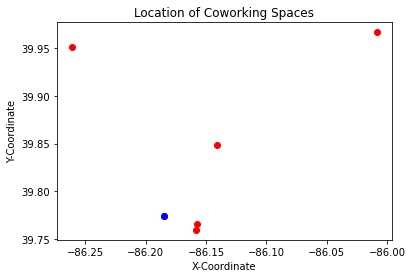

In [14]:
plot = plt.scatter(x="xcoordinate", y="ycoordinate", data=df[0:6], color = 'red')
plot = plt.scatter(x="xcoordinate", y="ycoordinate", data=df[0:1], color = 'blue')
plt.title("Location of Coworking Spaces")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")

From our plot, the blue dot represents the free housing and the red represents the 5 different co-working spaces. We can see that there are two spaces which are quite far. We will now get the exact mileage. 

In [15]:
# Getting the distance in miles from IUPUI to each coworking space
miles_dict = {}
miles_dict["IUPUI"] = "NA"
now = datetime.now()
test = []
for key in work:
    directions_result = gmaps.directions(coordinate_dict["IUPUI"],
                                         coordinate_dict[key],
                                         mode="driving", 
                                         departure_time = now)
    distance = directions_result[0]['legs']
    to_str = str(distance)
    splitter = to_str.split('mi')
    get_miles = splitter[0][-5:]
    remove = get_miles.replace("'","")
    convert = float(remove)
    miles_dict[key] = convert
    
miles_dict

{'IUPUI': 'NA',
 'The Speak Easy': 7.3,
 'zWORKS': 17.4,
 'Launch Fishers': 22.4,
 'Industrious Mass Ave': 2.1,
 'Launch Indy': 2.5}

In [16]:
# Adding the new column of mileage to the dataset
df['Miles away from Housing'] = [miles_dict["IUPUI"],miles_dict["The Speak Easy"],miles_dict["zWORKS"],miles_dict["Launch Fishers"],miles_dict["Industrious Mass Ave"],miles_dict["Launch Indy"]] 

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df

,Name,Address,Type,xcoordinate,ycoordinate,Miles away from Housing
0,IUPUI,"415 Porto Alegre St, Indianapolis, IN 46202",Housing,-86.184912,39.773890,NA
1,The Speak Easy,"5255 Winthrop Ave #110, Indianapolis, IN 46220",Coworking,-86.141295,39.848873,7.3
2,zWORKS,"85 E Cedar St #1502, Zionsville, IN 46077",Coworking,-86.260870,39.951492,17.4
3,Launch Fishers,"12175 Visionary Way, Fishers, IN 46038",Coworking,-86.008809,39.966764,22.4
4,Industrious Mass Ave,"350 Massachusetts Ave Suite 300, Indianapolis,...",Coworking,-86.157617,39.765831,2.1
5,Launch Indy,"525 S Meridian St, Indianapolis, IN 46225",Coworking,-86.158047,39.759349,2.5


As we see, zWORKS and Launch Fishers around both over 15 miles away from housing, making it inconvient to meet there for a coworking space. 

**But what defines the most convenient working space:**

- Distance
- Wifi
- Space/Availibility
- Food Access

In this case, the most convenient working space may seem ambiguous. We will assume Wifi and Space in co-working space is similar in each space. Some places have food service within the space or very close by so we will strictly be focusing in on distance. We will now take a look at the events and where they are located. 

## Event Planning

A 10 week program is a lot of time to get to know your co-workers. We will start with a bi-weekly dinner on Wednesday nights to spend quality time with your co-workers. Weekly dinners could be a lot of money and people could be busy with other events as well, so in total, we will have 5 dinners. We will start with dinners on week 1 to really build the relationship among each other. These links below were very helpful in event planning in Indianapolis.

- https://www.yelp.com/search?find_desc=Restaurants&find_loc=Indianapolis%2C+IN
- https://www.visitindy.com/indianapolis-things-to-do-events
- https://www.eventbrite.com/d/in--indianapolis/all-events/?end_date=2022-08-06&page=2&start_date=2022-05-29
- https://img.mlbstatic.com/milb-images/image/upload/milb/eqe0bqa8nf0yrjvxkjpn.pdf
- https://eiteljorg.org

There are many great restaurants in Indianapolis, but based on best rated restaurants from yelp and personal experiences, the five restaurants that were chosen were:

- Condado Tacos
- The Garage Food Hall
- The Tavern
- The Eagle
- Goodwood Indy

Dinners will take place on Wednesday nights at 6:00pm.

**Events**

Some events outside of eating will include Indianapolis Indians game, escape room, Spark Fishers event, and the Eiteljorg Museum. These events will typically occur on the off week of dinner. 

Our first event will be Thursday, June 9th (time TBD) when the Indianapolis Indians play the Cleveland Indians (Baseball Team). 

Our next event will be an escape room at the Escape Room Indianapolis Thursday June 23rd at 7:00pm. Escape rooms are a fun but challenging team building exercise. 

The next event will be the annual Spark Fishers Event. (Exact dates TBD but usually towards the end of June). This event includes:

- Tuesday Night Concert 
- Evening 5k Fun Run 
- Car & Arts Show
- Friday Night Concert 
- Street Fair, Parade, & Fireworks

Our final event be at the Eiteljorg Museum, Thursday July 21, at 7:00pm. The museum includes lots of different cultural art and traditions. All of these events together tie to many different interests.

## Plotting the Events and Restaurants

In [18]:
# First we need to get the address. 
# Addresses attained from google

condado = "530 Massachusetts Ave Suite 190, Indianapolis, IN 46204"
garage = "906 Carrollton Ave, Indianapolis, IN 46202"
tavern = "462-670 W McCarty St, Indianapolis, IN 46225"
eagle = "310 Massachusetts Ave, Indianapolis, IN 46204"
goodwood = "140 South Illinois Street Central, Indianapolis, IN 46225"

address_list = ['530 Massachusetts Ave Suite 190, Indianapolis, IN 46204','906 Carrollton Ave, Indianapolis, IN 46202','462-670 W McCarty St, Indianapolis, IN 46225','310 Massachusetts Ave, Indianapolis, IN 46204','140 South Illinois Street Central, Indianapolis, IN 46225', '501 W Maryland St, Indianapolis, IN 46225', '200 S Meridian St STE 220, Indianapolis, IN 46225','1 Municipal Dr, Fishers, IN 46038','500 W Washington St, Indianapolis, IN 46204']
names_list = ['Condado Tacos','The Garage Food Hall','The Tavern','The Eagle','Goodwood Indy','Indians Game','Escape Room','Spark Fishers','Eiteljorg Musem']

**Following similar procedure as above but this time with restaurants and events**

In [19]:
# Creating a dictionary with the name as a key with the address as a value
address_dict2 = {}
for i in range(len(names_list)):
    address_dict2[names_list[i]] = address_list[i]
address_dict2

{'Condado Tacos': '530 Massachusetts Ave Suite 190, Indianapolis, IN 46204',
 'The Garage Food Hall': '906 Carrollton Ave, Indianapolis, IN 46202',
 'The Tavern': '462-670 W McCarty St, Indianapolis, IN 46225',
 'The Eagle': '310 Massachusetts Ave, Indianapolis, IN 46204',
 'Goodwood Indy': '140 South Illinois Street Central, Indianapolis, IN 46225',
 'Indians Game': '501 W Maryland St, Indianapolis, IN 46225',
 'Escape Room': '200 S Meridian St STE 220, Indianapolis, IN 46225',
 'Spark Fishers': '1 Municipal Dr, Fishers, IN 46038',
 'Eiteljorg Musem': '500 W Washington St, Indianapolis, IN 46204'}

In [20]:
# Getting the x and y coordinates for the housing and each co-working space
coordinate_dict2 = {}
count2 = 0
for key in address_dict2:
    geocode_result = gmaps.geocode(address_dict2[key])
    coordinates = geocode_result[0]['geometry']['location']
    coordinate_dict2[key] = coordinates
coordinate_dict2

{'Condado Tacos': {'lat': 39.7748769, 'lng': -86.14990739999999},
 'The Garage Food Hall': {'lat': 39.7799969, 'lng': -86.1437581},
 'The Tavern': {'lat': 39.7571152, 'lng': -86.16647309999999},
 'The Eagle': {'lat': 39.7718129, 'lng': -86.1539722},
 'Goodwood Indy': {'lat': 39.7648517, 'lng': -86.1603919},
 'Indians Game': {'lat': 39.7649582, 'lng': -86.16849979999999},
 'Escape Room': {'lat': 39.7639469, 'lng': -86.1584453},
 'Spark Fishers': {'lat': 39.9586342, 'lng': -86.0170203},
 'Eiteljorg Musem': {'lat': 39.76855150000001, 'lng': -86.1677844}}

In [21]:
# Getting the distance in miles from IUPUI to each coworking space
miles_dict2 = {}
miles_dict2["IUPUI"] = "NA"
now = datetime.now()

for key in coordinate_dict2:
    directions_result2 = gmaps.directions(coordinate_dict["IUPUI"],
                                         coordinate_dict2[key],
                                         mode="driving", 
                                         departure_time = now)
    distance = directions_result2[0]['legs']
    to_str = str(distance)
    splitter = to_str.split('mi')
    get_miles = splitter[0][-5:]
    remove = get_miles.replace("'","")
    convert = float(remove)
    miles_dict2[key] = convert
    
miles_dict2

num = 0
for i in names_list:
    if num < 5:
        df.loc[len(df.index)] = [names_list[num], address_dict2[i],'Restaurant',coordinate_dict2[names_list[num]]['lng'],coordinate_dict2[names_list[num]]['lat'],miles_dict2[names_list[num]]]
    else:
        df.loc[len(df.index)] = [names_list[num], address_dict2[i],'Event',coordinate_dict2[names_list[num]]['lng'],coordinate_dict2[names_list[num]]['lat'],miles_dict2[names_list[num]]]
    num +=1 

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [22]:
df['Event Date and Time'] = ['NA','NA','NA','NA','NA','NA','First week Wednesday at 6:00pm','Third Week Wednesday at 6:00pm','Fifth Week Wednesday at 6:00pm','Seventh Week Wednesday at 6:00pm','Ninth Week Wednesday at 6:00pm','Thursday, June 9th (time TBD)','Thursday June 23rd at 7:00pm','End of June','Thursday July 21, at 7:00pm']

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
final_df = df
final_df

,Name,Address,Type,xcoordinate,ycoordinate,Miles away from Housing,Event Date and Time
0,IUPUI,"415 Porto Alegre St, Indianapolis, IN 46202",Housing,-86.184912,39.773890,NA,NA
1,The Speak Easy,"5255 Winthrop Ave #110, Indianapolis, IN 46220",Coworking,-86.141295,39.848873,7.3,NA
2,zWORKS,"85 E Cedar St #1502, Zionsville, IN 46077",Coworking,-86.260870,39.951492,17.4,NA
3,Launch Fishers,"12175 Visionary Way, Fishers, IN 46038",Coworking,-86.008809,39.966764,22.4,NA
4,Industrious Mass Ave,"350 Massachusetts Ave Suite 300, Indianapolis,...",Coworking,-86.157617,39.765831,2.1,NA
5,Launch Indy,"525 S Meridian St, Indianapolis, IN 46225",Coworking,-86.158047,39.759349,2.5,NA
6,Condado Tacos,"530 Massachusetts Ave Suite 190, Indianapolis,...",Restaurant,-86.149907,39.774877,2.3,First week Wednesday at 6:00pm
7,The Garage Food Hall,"906 Carrollton Ave, Indianapolis, IN 46202",Restaurant,-86.143758,39.779997,3,Third Week Wednesday at 6:00pm
8,The Tavern,"462-670 W McCarty St, Indianapolis, IN 46225",Restaurant,-86.166473,39.757115,2.2,Fifth Week Wednesday at 6:00pm
9,The Eagle,"310 Massachusetts Ave, Indianapolis, IN 46204",Restaurant,-86.153972,39.771813,1.9,Seventh Week Wednesday at 6:00pm


## Plotting the data with the new restaurants/events

Text(0, 0.5, 'Y-Coordinate')

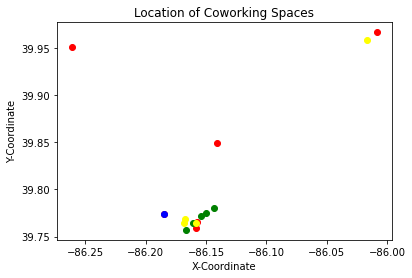

In [24]:
plot = plt.scatter(x="xcoordinate", y="ycoordinate", data=df[0:6], color = 'red')
plot = plt.scatter(x="xcoordinate", y="ycoordinate", data=df[0:1], color = 'blue')
plot = plt.scatter(x="xcoordinate", y="ycoordinate", data=df[6:11], color = 'green')
plot = plt.scatter(x="xcoordinate", y="ycoordinate", data=df[11:15], color = 'yellow')
plt.title("Location of Coworking Spaces")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")

From the plot above, we add in the green and yellow dots. The green dots represent restaurants and the yellow dots represent our events. The restaurants are all clustered together around the housing and the two  close co-working spaces.

## Final Conclusions

**We will first recap all of our findings**

First, our final dataframe:

In [25]:
final_df

,Name,Address,Type,xcoordinate,ycoordinate,Miles away from Housing,Event Date and Time
0,IUPUI,"415 Porto Alegre St, Indianapolis, IN 46202",Housing,-86.184912,39.773890,NA,NA
1,The Speak Easy,"5255 Winthrop Ave #110, Indianapolis, IN 46220",Coworking,-86.141295,39.848873,7.3,NA
2,zWORKS,"85 E Cedar St #1502, Zionsville, IN 46077",Coworking,-86.260870,39.951492,17.4,NA
3,Launch Fishers,"12175 Visionary Way, Fishers, IN 46038",Coworking,-86.008809,39.966764,22.4,NA
4,Industrious Mass Ave,"350 Massachusetts Ave Suite 300, Indianapolis,...",Coworking,-86.157617,39.765831,2.1,NA
5,Launch Indy,"525 S Meridian St, Indianapolis, IN 46225",Coworking,-86.158047,39.759349,2.5,NA
6,Condado Tacos,"530 Massachusetts Ave Suite 190, Indianapolis,...",Restaurant,-86.149907,39.774877,2.3,First week Wednesday at 6:00pm
7,The Garage Food Hall,"906 Carrollton Ave, Indianapolis, IN 46202",Restaurant,-86.143758,39.779997,3,Third Week Wednesday at 6:00pm
8,The Tavern,"462-670 W McCarty St, Indianapolis, IN 46225",Restaurant,-86.166473,39.757115,2.2,Fifth Week Wednesday at 6:00pm
9,The Eagle,"310 Massachusetts Ave, Indianapolis, IN 46204",Restaurant,-86.153972,39.771813,1.9,Seventh Week Wednesday at 6:00pm


Second, our final cluster plot:

Text(0, 0.5, 'Y-Coordinate')

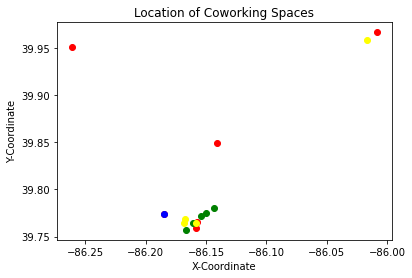

In [26]:
plot = plt.scatter(x="xcoordinate", y="ycoordinate", data=df[0:6], color = 'red')
plot = plt.scatter(x="xcoordinate", y="ycoordinate", data=df[0:1], color = 'blue')
plot = plt.scatter(x="xcoordinate", y="ycoordinate", data=df[6:11], color = 'green')
plot = plt.scatter(x="xcoordinate", y="ycoordinate", data=df[11:15], color = 'yellow')
plt.title("Location of Coworking Spaces")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")

Finally our dataframe with event planning:

In [27]:
final_df[-9:]

,Name,Address,Type,xcoordinate,ycoordinate,Miles away from Housing,Event Date and Time
6,Condado Tacos,"530 Massachusetts Ave Suite 190, Indianapolis,...",Restaurant,-86.149907,39.774877,2.3,First week Wednesday at 6:00pm
7,The Garage Food Hall,"906 Carrollton Ave, Indianapolis, IN 46202",Restaurant,-86.143758,39.779997,3,Third Week Wednesday at 6:00pm
8,The Tavern,"462-670 W McCarty St, Indianapolis, IN 46225",Restaurant,-86.166473,39.757115,2.2,Fifth Week Wednesday at 6:00pm
9,The Eagle,"310 Massachusetts Ave, Indianapolis, IN 46204",Restaurant,-86.153972,39.771813,1.9,Seventh Week Wednesday at 6:00pm
10,Goodwood Indy,"140 South Illinois Street Central, Indianapoli...",Restaurant,-86.160392,39.764852,2.1,Ninth Week Wednesday at 6:00pm
11,Indians Game,"501 W Maryland St, Indianapolis, IN 46225",Event,-86.168500,39.764958,1.8,"Thursday, June 9th (time TBD)"
12,Escape Room,"200 S Meridian St STE 220, Indianapolis, IN 46225",Event,-86.158445,39.763947,2.1,Thursday June 23rd at 7:00pm
13,Spark Fishers,"1 Municipal Dr, Fishers, IN 46038",Event,-86.017020,39.958634,22,End of June
14,Eiteljorg Musem,"500 W Washington St, Indianapolis, IN 46204",Event,-86.167784,39.768552,1.4,"Thursday July 21, at 7:00pm"


So now we come back to figuring out which co-working space is the most convenient. From our assumptions, we are primarily focusing in on distance. From our plot and dataframe, there are two co-working spaces that appear to be most convenient and they are Industrious Mass Ave and Launch Indy. They are both within 2.5 miles from our housing location making it convenient to drive, take public transit, bike, rent a scooter, or even walk. These locations are also very close to events and restaurants that take place shortly after work. After narrowing it down to these two locations, I did some research to close in on one and that would eventually be Industrious Mass Ave. They have great amenities such as a Wellness Room, Private Conference Rooms, Office Supplies, Daily Breakfast & Craft Coffee, Outdoor Space, Dining Options and so much more. These amenities go great along with the superb location around Indianapolis. Being that close to home, restaurants, and the entertainment, is something that everyone will look forward to, while also connecting with the growing Tech companies in Indianapolis.